# Харлунин А.А. (M32021 | ФВЧФ 1.1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# №1

In [2]:
def Tridiagonal(A, b):
    if (len(A) != len(b)):
        raise ValueError(f"Length is not the same: {len(A)} vs {len(b)}")
        
    N = len(A)
    
    v = np.zeros(N)
    v[0] = A[0][1]/-A[0][0]
    
    u = np.zeros(N)
    u[0] = -b[0]/-A[0][0]
    
    for i in range(1, N-1):
        v[i] = A[i][i+1]/(-A[i][i]-A[i][i-1]*v[i-1])
        
        u[i] = (A[i][i-1]*u[i-1]-b[i])/(-A[i][i]-A[i][i-1]*v[i-1])
    
    v[N-1] = 0
    
    u[N-1] = (A[N-1][N-2]*u[N-2]-b[N-1])/(-A[N-1][N-1]-A[N-1][N-2]*v[N-2])
    
    x = np.zeros(N)
    
    x[N-1] = u[N-1]
    for i in range(N-1, 0, -1):
        x[i-1] = v[i-1] * x[i] + u[i-1]
        
    return x

In [3]:
A = np.array([[1., 3., 0], 
              [-5., 7., 9.], 
              [0, -11., 13.]])
b = np.array([9., 8., -9.])
print(A)
print(b)
            
x_c = Tridiagonal(A, b)
print(x_c)

[[  1.   3.   0.]
 [ -5.   7.   9.]
 [  0. -11.  13.]]
[ 9.  8. -9.]
[3. 2. 1.]


In [4]:
A = np.array([[1., 3., 0], 
              [-5., 7., 9.], 
              [0, -11., 13.]])
b = np.array([9., 8., 9.])
print(A)
print(b)
            
x_c = Tridiagonal(A, b)
print(x_c)

[[  1.   3.   0.]
 [ -5.   7.   9.]
 [  0. -11.  13.]]
[9. 8. 9.]
[4.26233766 1.57922078 2.02857143]


In [5]:
A = np.array([[1., 3., 0., 0.], 
              [-5., 7., 9., 0.], 
              [0., -11., 13., 15.],
              [0., 0., -17., 19.]])
b = np.array([9., 8., -84., -112.])
print(A)
print(b)
            
x_c = Tridiagonal(A, b)
print(x_c)

[[  1.   3.   0.   0.]
 [ -5.   7.   9.   0.]
 [  0. -11.  13.  15.]
 [  0.   0. -17.  19.]]
[   9.    8.  -84. -112.]
[ 3.  2.  1. -5.]


# №2

In [6]:
def euler_method(f, x_arr, dot_koshi):
    N = len(x_arr)
    
    y = np.zeros(N)
    
    y[0] = dot_koshi[1]
    
    for i in range(1, N):
        y[i] = y[i-1] + (x_arr[i] - x_arr[i-1])*f(x_arr[i-1],y[i-1])
    
    return y

In [7]:
def euler_method_modif(f, x_arr, dot_koshi):
    N = len(x_arr)
    
    y = np.zeros(N)
    
    y[0] = dot_koshi[1]
    
    for i in range(1, N):
        y_prognose = y[i-1] + (x_arr[i] - x_arr[i-1])*f(x_arr[i-1],y[i-1])
        y[i] = y[i-1] + (x_arr[i] - x_arr[i-1])* \
            (f(x_arr[i-1],y[i-1]) + f(x_arr[i],y_prognose))/2
    
    return y

In [8]:
def euler_method_fixed(f, x_arr, dot_koshi):
    N = len(x_arr)
    
    y = np.zeros(N)
    
    y[0] = dot_koshi[1]
    
    for i in range(1, N):
        h = x_arr[i] - x_arr[i-1]
        
        k1 = f(x_arr[i-1], y[i-1])
        k2 = f(x_arr[i-1] + h, y[i-1] + k1)
        
        y[i] = y[i-1] + 0.5*h*(k1+k2)
        
    
    return y

# $y^{'} = xy^2$
### $y(0) = 2$

###  аналитическое решение
# $y = -\frac{2}{x^2-1}$

In [9]:
f1 = lambda x,y: x*y
k1 = (0,2)

f1_anal = lambda x: -2/(x**2-1)

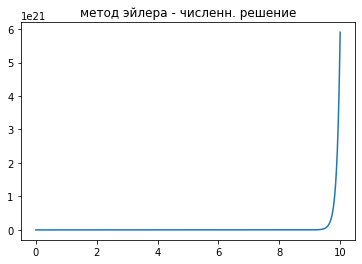

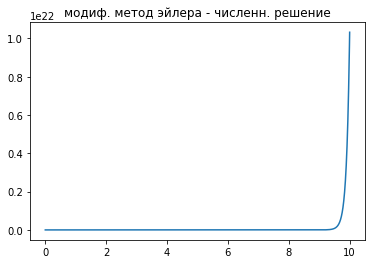

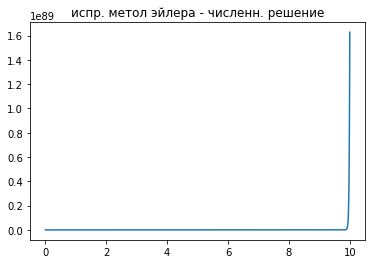

In [10]:
x_ = np.linspace(0,10,3000)

y_common = euler_method(f1, x_, k1)
y_modif = euler_method_modif(f1, x_, k1)
y_fixed = euler_method_fixed(f1, x_, k1)

plt.plot(x_, y_common)
plt.title("метод эйлера - численн. решение")
plt.show()

plt.plot(x_, y_modif)
plt.title("модиф. метод эйлера - численн. решение")
plt.show()

plt.plot(x_, y_fixed)
plt.title("испр. метол эйлера - численн. решение")
plt.show()

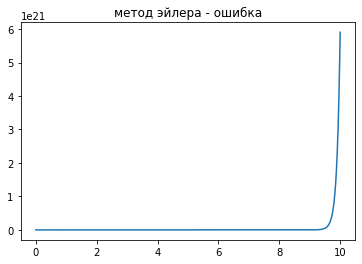

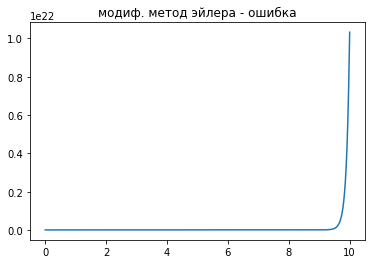

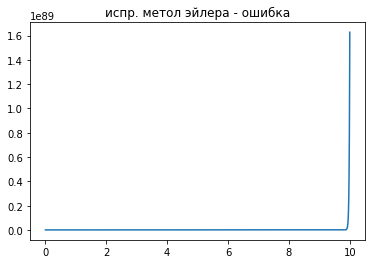

In [11]:
plt.plot(x_, y_common - f1_anal(x_))
plt.title("метод эйлера - ошибка")
plt.show()

plt.plot(x_, y_modif - f1_anal(x_))
plt.title("модиф. метод эйлера - ошибка")
plt.show()

plt.plot(x_, y_fixed - f1_anal(x_))
plt.title("испр. метол эйлера - ошибка")
plt.show()

# $y^{'} = 3x^2cos^2(y)$
### $y(0) = 0$
###  не решается явно относительно $y$ :(

In [12]:
f2 = lambda x,y: 3*x**2*np.cos(y)**2
k2 = (0,0)

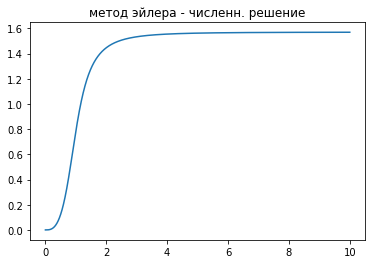

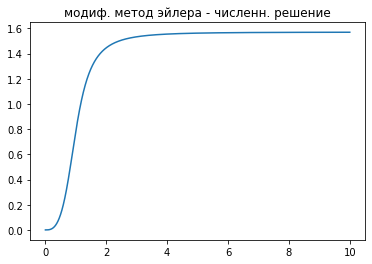

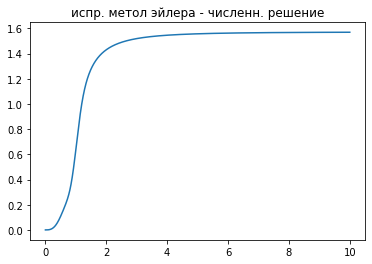

In [13]:
x_ = np.linspace(0,10,3000)
plt.plot(x_, euler_method(f2, x_, k2))
plt.title("метод эйлера - численн. решение")
plt.show()

plt.plot(x_, euler_method_modif(f2, x_, k2))
plt.title("модиф. метод эйлера - численн. решение")
plt.show()

plt.plot(x_, euler_method_fixed(f2, x_, k2))
plt.title("испр. метол эйлера - численн. решение")
plt.show()

# $y^{'} = ln(x)$
### $y(e) = -e$
###  аналитическое решение
# $y = xln(x)-x-e$

In [14]:
f3 = lambda x,y: np.log(x)
k3 = (math.e,-math.e)

f3_anal = lambda x: x*np.log(x) - x - math.e

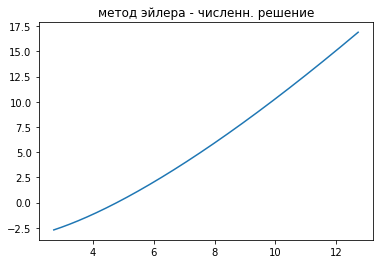

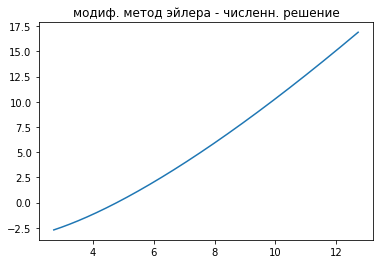

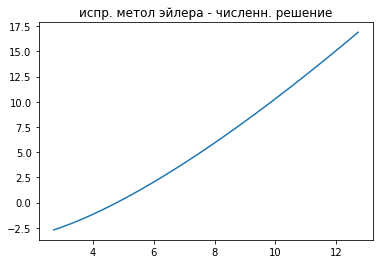

In [15]:
x_ = np.linspace(math.e,10+math.e,3000)

y_common = euler_method(f3, x_, k3)
y_modif = euler_method_modif(f3, x_, k3)
y_fixed = euler_method_fixed(f3, x_, k3)

plt.plot(x_, y_common)
plt.title("метод эйлера - численн. решение")
plt.show()

plt.plot(x_, y_modif)
plt.title("модиф. метод эйлера - численн. решение")
plt.show()

plt.plot(x_, y_fixed)
plt.title("испр. метол эйлера - численн. решение")
plt.show()

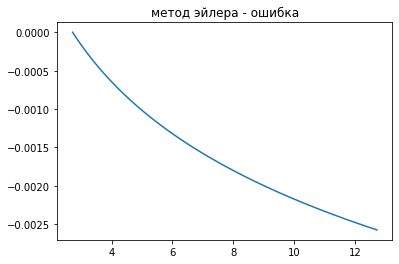

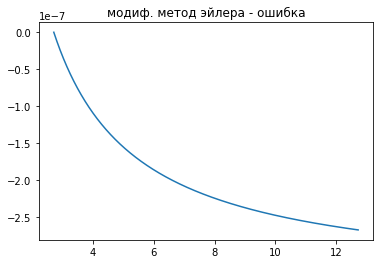

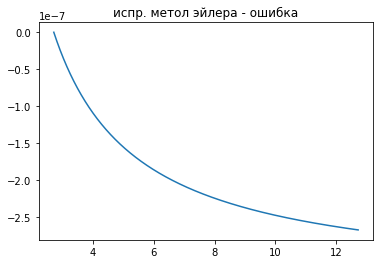

In [16]:
plt.plot(x_, y_common - f3_anal(x_))
plt.title("метод эйлера - ошибка")
plt.show()

plt.plot(x_, y_modif - f3_anal(x_))
plt.title("модиф. метод эйлера - ошибка")
plt.show()

plt.plot(x_, y_fixed - f3_anal(x_))
plt.title("испр. метол эйлера - ошибка")
plt.show()

# Метод прогонки в "компактном" виде

In [17]:
def Tridiagonal_shrinked(A, b):
    """
    A = 
    [[ a0    b0   c0]
     [ a1    b1   c1]
     [ a2    b2   c2]
            ...
     [aN-1  bN-1 cN-1]]
    
    """
    
    
    if (len(A) != len(b)):
        raise ValueError(f"Length is not the same: {len(A)} vs {len(b)}")
        
    N = len(A)
    
    v = np.zeros(N)
    
    if len(A) == 0:
        return v
    
    v[0] = A[0][2]/-A[0][1]
    
    u = np.zeros(N)
    u[0] = -b[0]/-A[0][1]
    
    for i in range(1, N-1):
        v[i] = A[i][2]/(-A[i][1]-A[i][0]*v[i-1])
        
        u[i] = (A[i][0]*u[i-1]-b[i])/(-A[i][1]-A[i][0]*v[i-1])
    
    v[N-1] = 0
    
    u[N-1] = (A[N-1][0]*u[N-2]-b[N-1])/(-A[N-1][1]-A[N-1][0]*v[N-2])
    
    x = np.zeros(N)
    
    x[N-1] = u[N-1]
    for i in range(N-1, 0, -1):
        x[i-1] = v[i-1] * x[i] + u[i-1]
        
    return x

In [18]:
A = np.array([[0., 1., 3.], 
              [-5., 7., 9.], 
              [-11., 13., 0.]])
b = np.array([9., 8., -9.])
print(A)
print(b)
            
x_c = Tridiagonal_shrinked(A, b)
print(x_c)

[[  0.   1.   3.]
 [ -5.   7.   9.]
 [-11.  13.   0.]]
[ 9.  8. -9.]
[3. 2. 1.]


In [19]:
A = np.array([[0., 1., 3.], 
              [-5., 7., 9.], 
              [-11., 13., 0.]])
b = np.array([9., 8., 9.])
print(A)
print(b)
            
x_c = Tridiagonal_shrinked(A, b)
print(x_c)

[[  0.   1.   3.]
 [ -5.   7.   9.]
 [-11.  13.   0.]]
[9. 8. 9.]
[4.26233766 1.57922078 2.02857143]


In [20]:
A = np.array([[0., 1., 3.], 
              [-5., 7., 9.], 
              [-11., 13., 15.],
              [-17., 19., 0.]])
b = np.array([9., 8., -84., -112.])
print(A)
print(b)
            
x_c = Tridiagonal_shrinked(A, b)
print(x_c)

[[  0.   1.   3.]
 [ -5.   7.   9.]
 [-11.  13.  15.]
 [-17.  19.   0.]]
[   9.    8.  -84. -112.]
[ 3.  2.  1. -5.]
